(1200, 100)
(3600, 100)
(12000, 100)
<class 'numpy.ndarray'> object
False False False


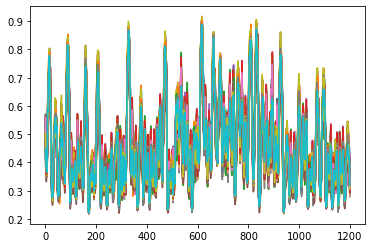

In [2]:
import pickle
import pandas as pd
import metrics
import numpy as np

load_train = pickle.load(open("pickles/load_scenarios.pickle", 'rb'))
pv_train = pickle.load(open("pickles/pv_scenarios.pickle", 'rb'))
wind_train = pickle.load(open("pickles/wind_scenarios.pickle",'rb'))

print(load_train.shape)
print(pv_train.shape)
print(wind_train.shape)
print(type(wind_train), wind_train.dtype)

print(np.isnan(wind_train.astype(float)).any(), np.isnan(load_train.astype(float)).any(), np.isnan(pv_train.astype(float)).any())

wind_train[wind_train < 0] = 0
wind_train[wind_train > 1] = 1

pv_train[pv_train < 0] = 0
pv_train[pv_train > 1] = 1

load_train[load_train < 0] = 0
load_train[load_train > 1] = 1

pickleFile = open("pickles/wind_scenarios.pickle", 'wb')
pickle.dump(wind_train.astype(float), pickleFile, protocol=pickle.HIGHEST_PROTOCOL)
pickleFile.close()
pickleFile = open("pickles/pv_scenarios.pickle", 'wb')
pickle.dump(pv_train.astype(float), pickleFile, protocol=pickle.HIGHEST_PROTOCOL)
pickleFile.close()
pickleFile = open("pickles/load_scenarios.pickle", 'wb')
pickle.dump(load_train.astype(float), pickleFile, protocol=pickle.HIGHEST_PROTOCOL)
pickleFile.close()

import matplotlib.pyplot as plt

plt.plot(load_train)
plt.show()

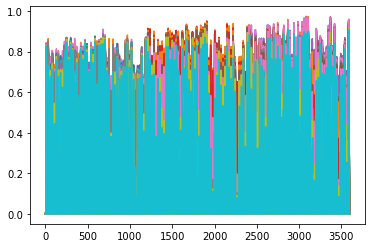

In [3]:
plt.plot(pv_train)
plt.show()

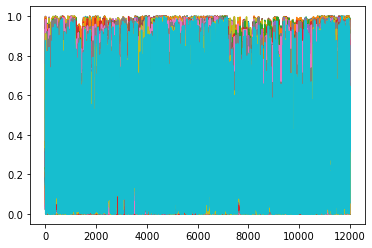

In [4]:
plt.plot(wind_train)
plt.show()

In [14]:
N_SCENARIOS = 100

(50, 24, 100)

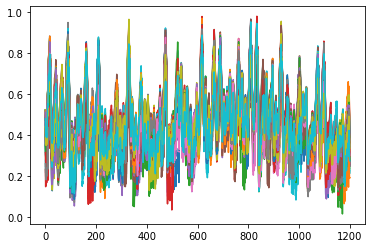

(1200, 100)

In [45]:
load_train = pickle.load(open("pickles/scenarios_load_GAN_wasserstein_1_0_100_TEST.pickle", 'rb'))
plt.plot(load_train)
plt.show()
load_train.shape

In [11]:
wind_train = pickle.load(open("pickles/scenarios_wind_GAN_wasserstein_1_0_100_TEST.pickle", 'rb'))
wind_train.shape

(12000, 100)

In [15]:
pv_train = pickle.load(open("pickles/scenarios_pv_GAN_wasserstein_1_0_100_TEST.pickle", 'rb'))
pv_train.shape
type(pv_train)

numpy.ndarray

In [14]:
type(wind_train)

numpy.ndarray

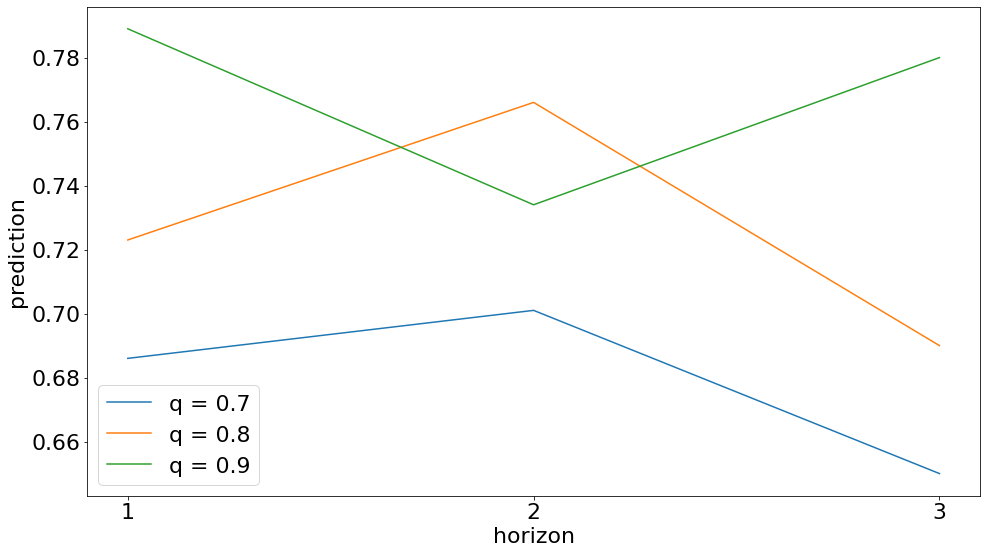

In [18]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(16,9))
plt.plot(x, [0.686, 0.701, 0.65], label = 'q = 0.7')
plt.plot(x, [0.723, 0.766, 0.69], label = 'q = 0.8')
plt.plot(x, [0.789, 0.734, 0.78], label = 'q = 0.9')
plt.xlabel("horizon")
plt.ylabel("prediction")
plt.xticks(x)
plt.legend()
plt.show()

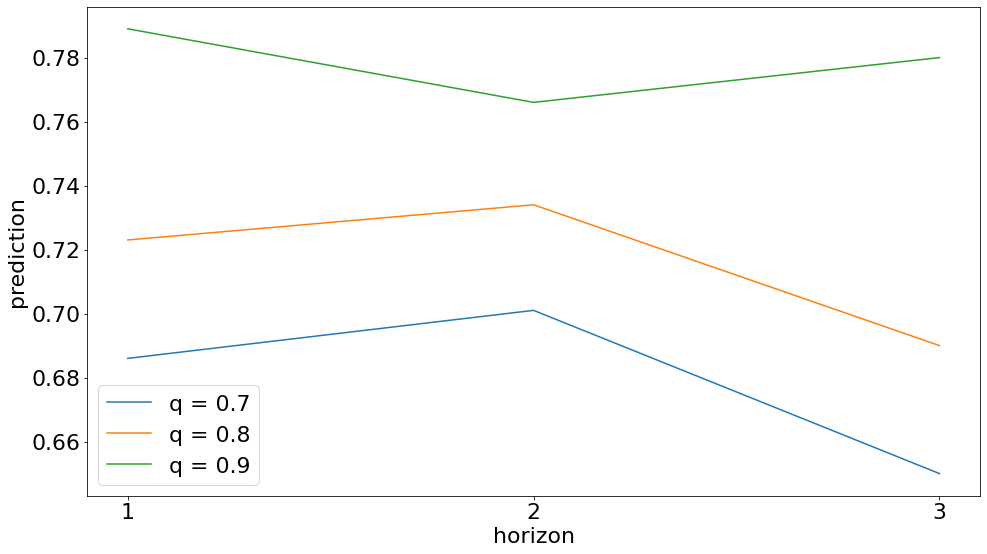

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.plot(x, [0.686, 0.701, 0.65], label = 'q = 0.7')
plt.plot(x, [0.723, 0.734, 0.69], label = 'q = 0.8')
plt.plot(x, [0.789, 0.766, 0.78], label = 'q = 0.9')
plt.xlabel("horizon")
plt.ylabel("prediction")
plt.legend()
plt.xticks(x)
plt.show()

In [12]:
import numpy
import matplotlib.pyplot as plt

N = 15
numpy.random.seed(0)

preds = []
orig = numpy.random.uniform(size=N) + numpy.random.uniform(size=N) + 0.3

for i in range(5):
    preds.append(numpy.random.normal(size=N) + numpy.random.uniform(size=N) + i * 0.1)

preds = numpy.sort(preds, axis=0)


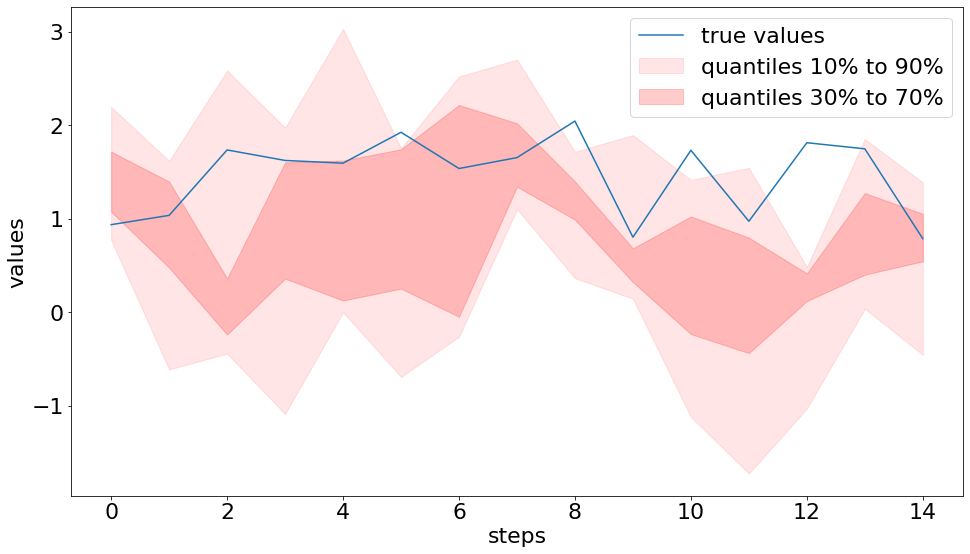

In [22]:
alphas = [0.1, 0.2, 0.3, 0.2, 0.1]
plt.figure(figsize=(16,9))
plt.plot(orig, label = 'true values')
for i in range(2):
    plt.fill_between(numpy.arange(15), preds[i], preds[4-i], color='r', alpha = alphas[i], label = 'quantiles {0}% to {1}%'.format(i*20 + 10, 90-i*20) )
plt.xlabel('steps')
plt.ylabel('values')
plt.legend()
plt.show()

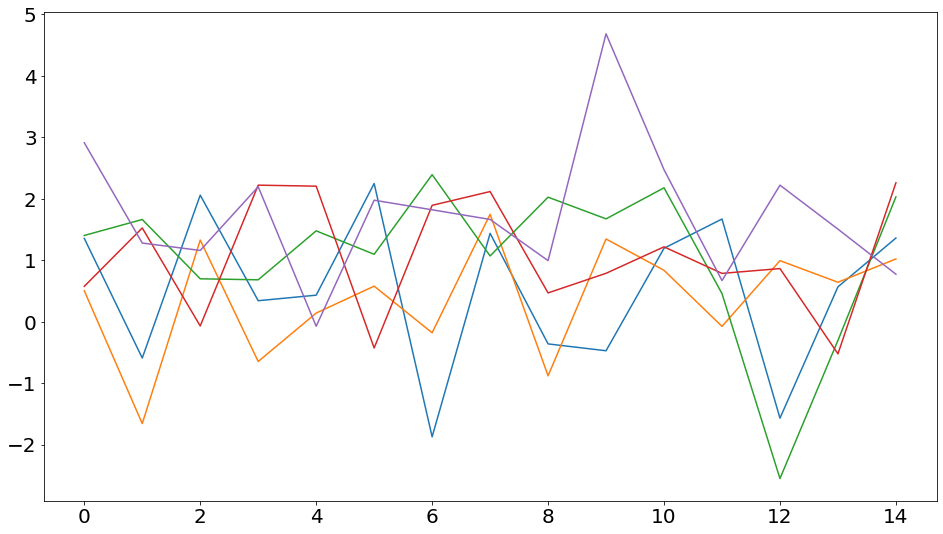

In [14]:
scenarios = []
plt.figure(figsize=(16,9))
for i in range(5):
    scenarios.append((numpy.random.normal(size=N) + numpy.random.uniform(size=N) + i * 0.3) * 0.9)
    plt.plot(scenarios[i])
plt.show()

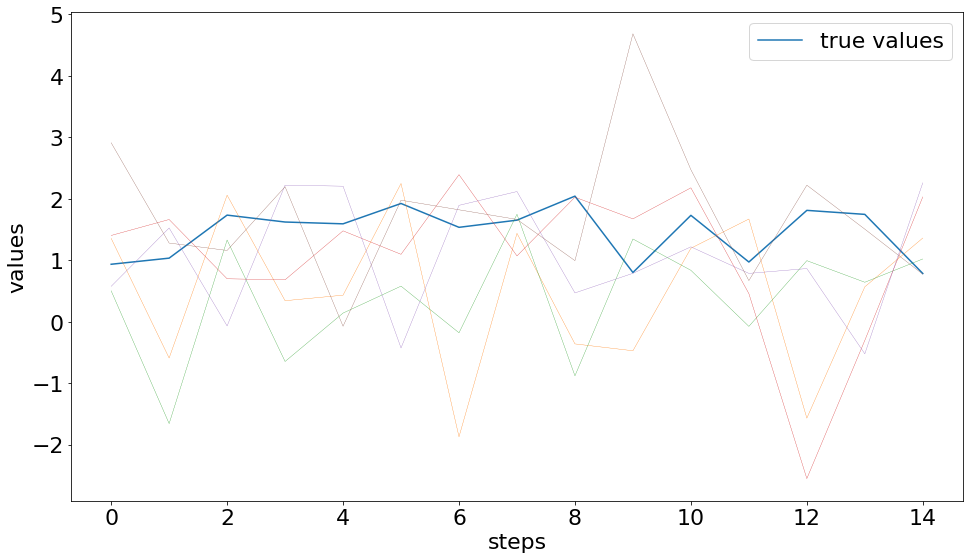

In [23]:
plt.figure(figsize=(16,9))
plt.plot(orig, label = 'true values')
for i in range(5):
    plt.plot(scenarios[i], linewidth = 0.3)

plt.xlabel('steps')
plt.ylabel('values')
plt.legend()
plt.show()

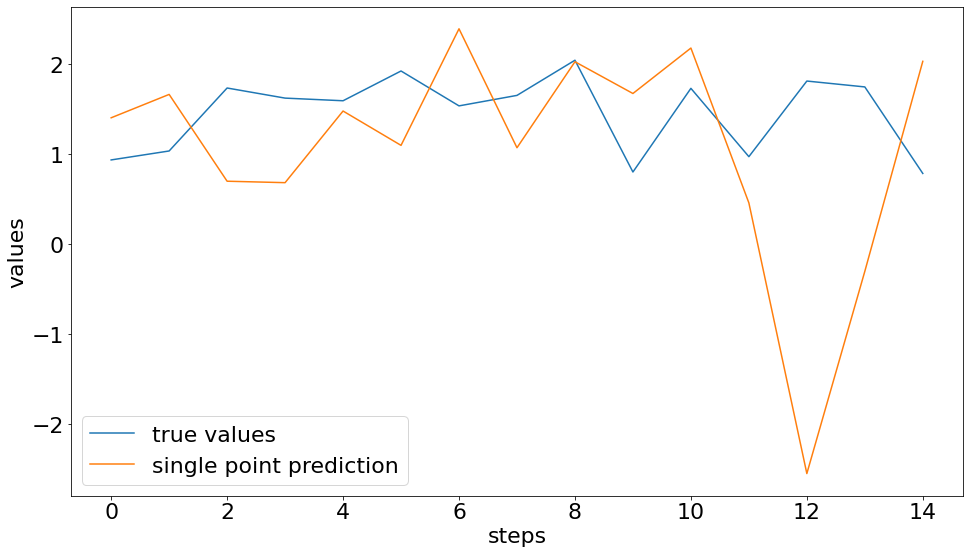

In [24]:
plt.figure(figsize=(16,9))
plt.plot(orig, label = 'true values')
plt.plot(scenarios[2], label = 'single point prediction')

plt.xlabel('steps')
plt.ylabel('values')
plt.legend()
plt.show()